# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import pickle
import polars as pl
import pandas as pd
import os
# The data Structure + Helper_Functions 
from src.Helper_Functions import Load_idx_maps ,load_model

# Dimentionality Reduction - PCA for a 30d trait vectors

## Movies Embeddings

In [4]:
experiment_folder = "Experiments_ml-32m/B_U_V_F/"
data_folder = 'Training_data/ml-32m'
# K_factors = 30; lambda_reg = 1 ; gamma = 0.01 ; taw =  10
user_idx_map, movie_idx_map, idx_to_user, idx_to_movie, genre_to_idx, specific_indices = Load_idx_maps(data_folder)
movies_factors,users_factors,user_bias,item_bias,feature_vectors = load_model(experiment_folder)

In [29]:
def create_idx_to_title(movies_csv_path, movie_idx_map):
    # Load the movies.csv file into a DataFrame
    movies_df = pd.read_csv(movies_csv_path)

    # Ensure columns 'movieId' and 'title' exist in the DataFrame
    if 'movieId' not in movies_df.columns or 'title' not in movies_df.columns:
        raise ValueError("The CSV file must contain 'movieId' and 'title' columns.")

    # Create a mapping from movie_id to title
    movie_id_to_title = dict(zip(movies_df['movieId'], movies_df['title']))

    # Create the idx_to_title dictionary using movie_idx_map

    idx_to_title = {idx: movie_id_to_title[movie_id] for movie_id, idx in movie_idx_map.items() if movie_id in movie_id_to_title}

    return idx_to_title
movies_csv_path = "Data/ml-32m/movies.csv"  # Path to the movies.csv file
idx_to_title = create_idx_to_title(movies_csv_path, movie_idx_map)

/tmp/ipykernel_21958/3544702452.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap(colormap, num_genres)


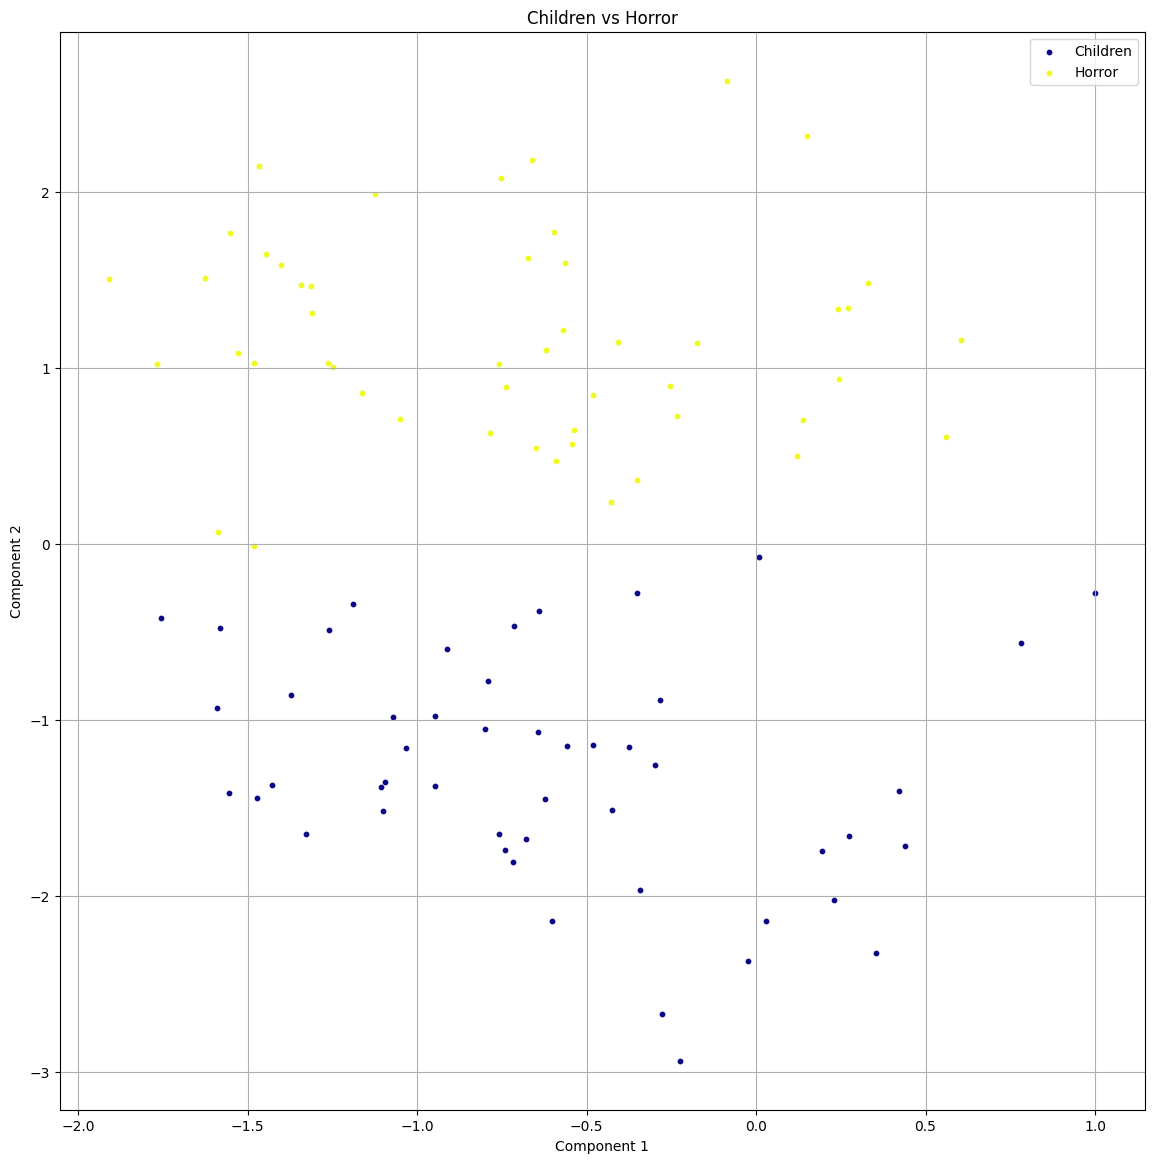

In [6]:
def plot_genre_embeddings(movie_embeddings, specific_indices, genres, colormap='viridis', n_points=100, title="Movie Embeddings Visualization"):

    # Step 1: Dimensionality reduction
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(movie_embeddings)

    # Step 2: Setup the plot and colors
    num_genres = len(genres)
    colors = cm.get_cmap(colormap, num_genres)
    plt.figure(figsize=(14, 14))

    # Step 3: Plot movies by genre
    for genre_idx, genre in enumerate(genres):
        if genre not in specific_indices:
            print(f"Warning: Genre '{genre}' not found in specific indices. Skipping.")
            continue
        color = colors(genre_idx)
        for i in specific_indices[genre][:n_points]:
            x, y = reduced_embeddings[i]
            plt.scatter(x, y, color=color, s=10, label=genre if genre not in plt.gca().get_legend_handles_labels()[1] else "")
            # Optional: Add text for each point (e.g., movie title)
            # plt.text(x, y, fontsize=8)

    # Step 4: Finalize the plot
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_genre_embeddings(movies_factors, specific_indices, ['Children', 'Horror'], colormap='plasma', n_points=50, title="Children vs Horror")


## Features Embeddings

In [15]:
# Step 1: Dimensionality reduction
pca = PCA(n_components=2)
reduced_features_embeddings = pca.fit_transform(feature_vectors)
colormap = 'plasma'
# Step 2: Setup the plot and colors
genres = list(specific_indices.keys())  # List of genres

num_genres = len(genres)
colors = cm.get_cmap(colormap, num_genres)
plt.figure(figsize=(14, 14))
reduced_features_embeddings.shape

/tmp/ipykernel_21958/3417729999.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap(colormap, num_genres)


(19, 2)

<Figure size 1400x1400 with 0 Axes>

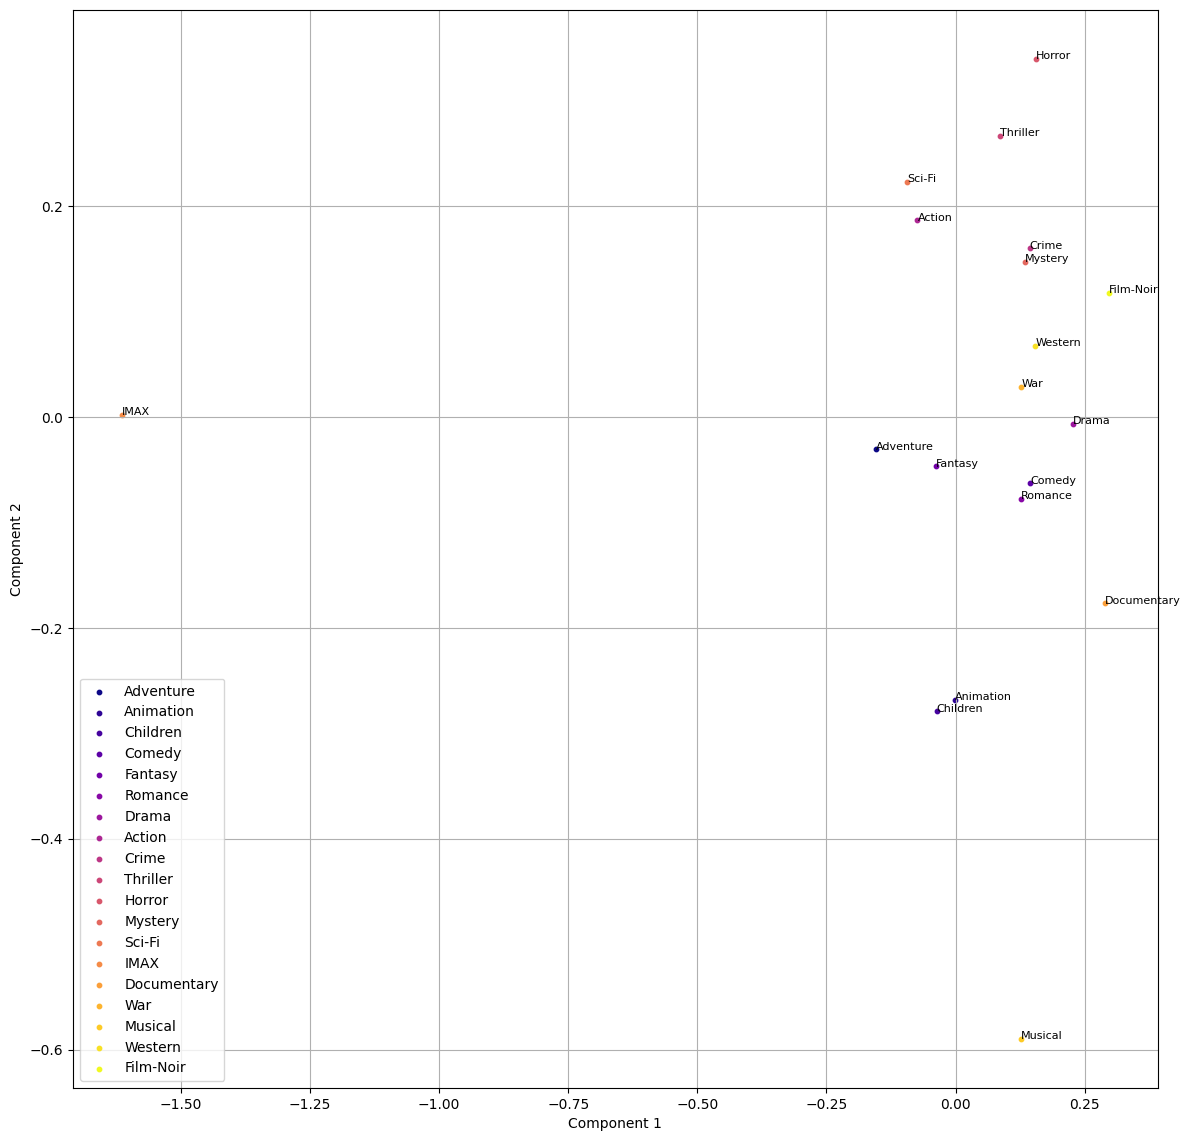

In [19]:
plt.figure(figsize=(14, 14))
# Step 3: Plot movies by genre
for genre_idx, genre in enumerate(genres):
    if genre not in specific_indices:
        print(f"Warning: Genre '{genre}' not found in specific indices. Skipping.")
        continue
    color = colors(genre_idx)
    x, y = reduced_features_embeddings[genre_idx]
    plt.scatter(x, y, color=color, s=10, label=genre if genre not in plt.gca().get_legend_handles_labels()[1] else "")
    # Optional: Add text for each point (e.g., movie title)
    plt.text(x, y,genre, fontsize=8)

# Step 4: Finalize the plot
# plt.title(title)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()

# Using 2D Trained trait Vectors

## Movies Embeddings

In [35]:
experiment_folder = "Experiments_ml-32m/2d_latent_vector/"
data_folder = 'Training_data/ml-32m'
# K_factors = 30; lambda_reg = 1 ; gamma = 0.01 ; taw =  10
user_idx_map, movie_idx_map, idx_to_user, idx_to_movie, genre_to_idx, specific_indices = Load_idx_maps(data_folder)
movies_factors,users_factors,user_bias,item_bias,feature_vectors = load_model(experiment_folder)
# Example genres and their specific indices for the plot
genres = list(specific_indices.keys())  # List of genres

genres = [
 'Children',
 'Horror']
num_genres = len(genres)


/tmp/ipykernel_21958/1597781801.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap(colormap, num_genres)


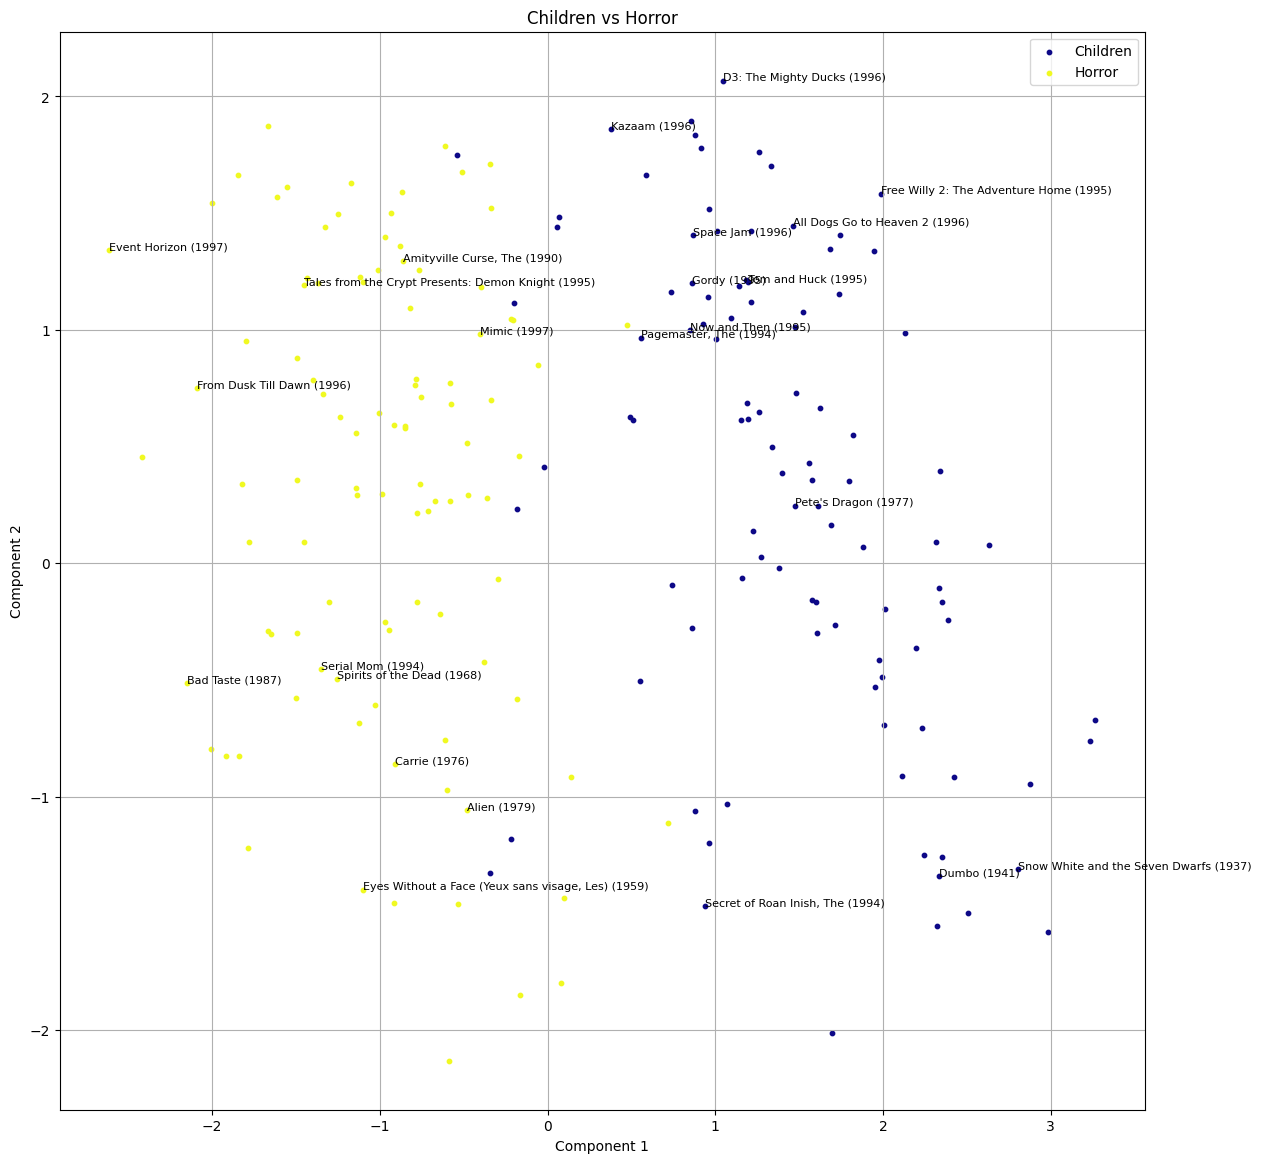

In [31]:
def plot_genre_embeddings(movie_embeddings, specific_indices, genres, colormap='viridis', n_points=100, title="Movie Embeddings Visualization"):
    # Step 2: Setup the plot and colors
    num_genres = len(genres)
    colors = cm.get_cmap(colormap, num_genres)
    plt.figure(figsize=(14, 14))

    # Step 3: Plot movies by genre
    for genre_idx, genre in enumerate(genres):
        if genre not in specific_indices:
            print(f"Warning: Genre '{genre}' not found in specific indices. Skipping.")
            continue
        color = colors(genre_idx)
        for i in specific_indices[genre][:n_points]:
            x, y = movie_embeddings[i]
            plt.scatter(x, y, color=color, s=10, label=genre if genre not in plt.gca().get_legend_handles_labels()[1] else "")
            p = np.random.randint(low=0, high=100, size=1, dtype=int)
            if p < 10 :
                plt.text(x, y,idx_to_title[i], fontsize=8)

    # Step 4: Finalize the plot
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_genre_embeddings(movies_factors, specific_indices, genres=genres, colormap='plasma', n_points=100, title="Children vs Horror")


## Plot Featutes with 2D trait Vector

/tmp/ipykernel_21958/4281944300.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap(colormap, num_genres)


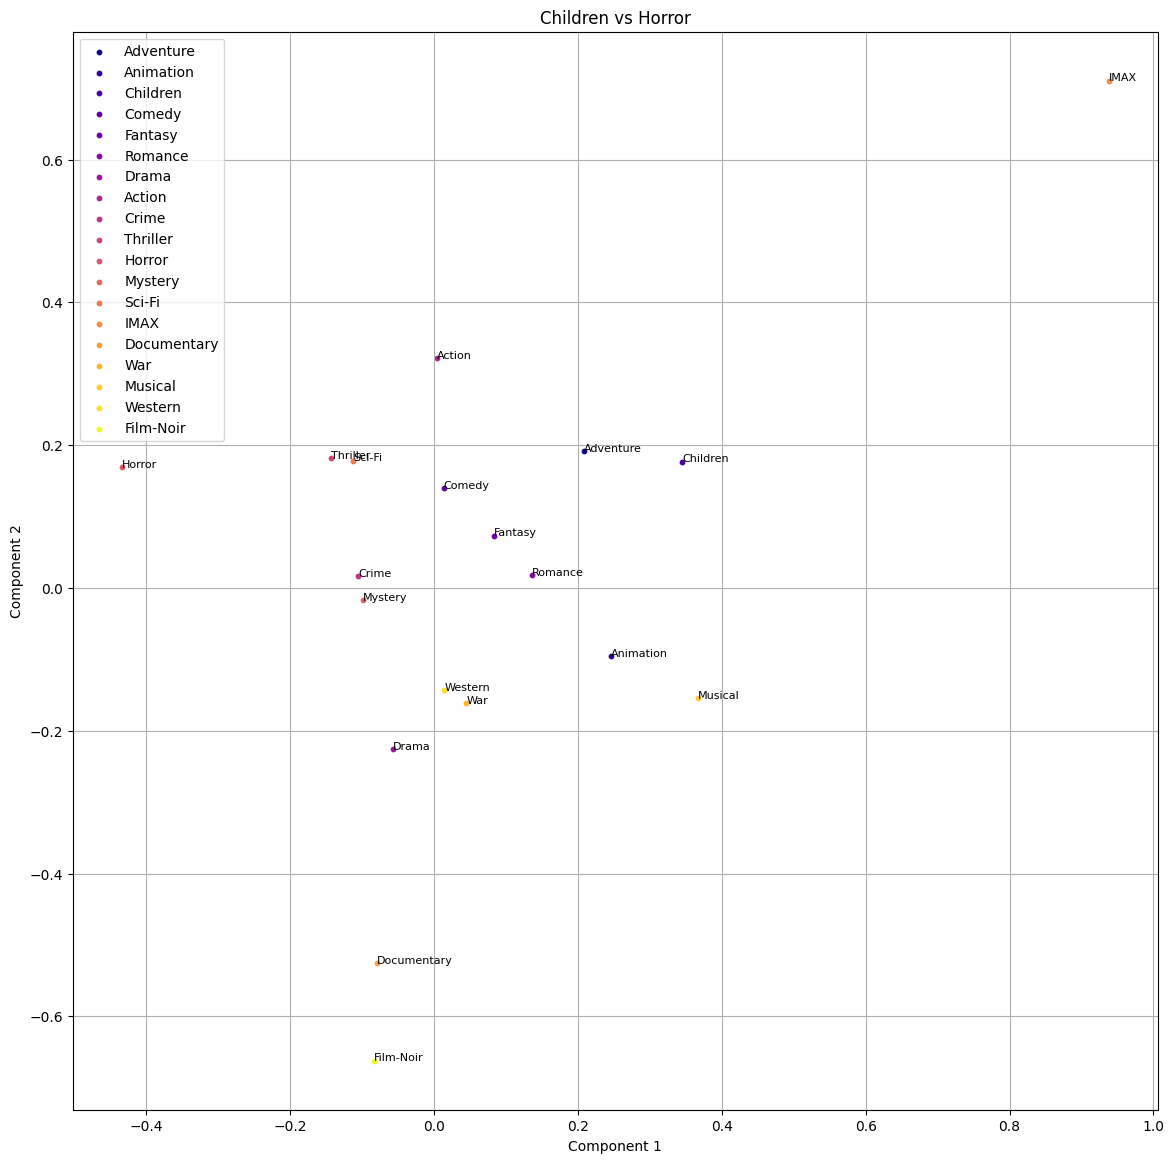

In [38]:
genres = list(specific_indices.keys())  # List of genres

num_genres = len(genres)
def plot_feature_embeddings(feature_vectors, specific_indices, genres, colormap='viridis', n_points=100, title="Movie Embeddings Visualization"):
    # Step 2: Setup the plot and colors
    num_genres = len(genres)
    colors = cm.get_cmap(colormap, num_genres)
    plt.figure(figsize=(14, 14))

    # Step 3: Plot movies by genre
    for genre_idx, genre in enumerate(genres):
        if genre not in specific_indices:
            print(f"Warning: Genre '{genre}' not found in specific indices. Skipping.")
            continue
        color = colors(genre_idx)
        x, y = feature_vectors[genre_idx]
        plt.scatter(x, y, color=color, s=10, label=genre if genre not in plt.gca().get_legend_handles_labels()[1] else "")
        plt.text(x, y,genre, fontsize=8)

    # Step 4: Finalize the plot
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_feature_embeddings(feature_vectors, specific_indices, genres=genres, colormap='plasma', n_points=100, title="Children vs Horror")
